# Heart Disease prdiction



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/Heart_Disease_Prediction.csv')
df.sample(5)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
240,68,1,3,180,274,1,2,150,1,1.6,2,0,7,Presence
245,60,1,4,130,253,0,0,144,1,1.4,1,1,7,Presence
163,58,1,4,128,259,0,2,130,1,3.0,2,2,7,Presence
52,65,0,3,140,417,1,2,157,0,0.8,1,1,3,Absence
85,42,1,1,148,244,0,2,178,0,0.8,1,2,3,Absence




---


# Understanding Data


Here is the information about each feature of the dataset:

* **Age**: The person's age in years
* **Sex**: The person's sex (1 = male, 0 = female)
* **Chest pain type**: Chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)
* **BP**: The person's resting blood pressure (mm Hg on admission to the hospital)
* **Cholesterol**: The person's serum cholesterol level in mg/dl
* **FBS over 120**: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
* **EKG results**: Resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
* **Max HR**: The person's maximum heart rate achieved
* **Exercise angina**: Exercise induced angina (1 = yes, 0 = no)
* **ST depression**: ST depression induced by exercise relative to rest
* **Slope of ST**: The slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping)
* **Number of vessels fluro**: The number of major vessels (0-3) colored by fluoroscopy
* **Thallium**: A thallium stress test (3 = normal; 6 = fixed defect; 7 = reversible defect)
* **Heart Disease**: The presence of heart disease (Absence, Presence)



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
Sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
Chest pain type,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
BP,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
FBS over 120,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
EKG results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
Max HR,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
Exercise angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
ST depression,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


In [ ]:
df['Heart Disease'].unique()

array(['Presence', 'Absence'], dtype=object)

<Axes: ylabel='Heart Disease'>

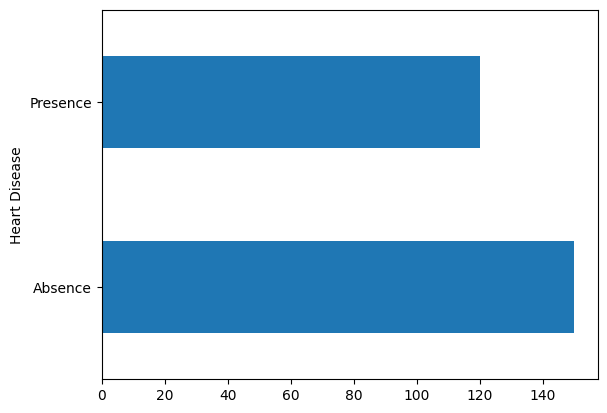

In [ ]:
df['Heart Disease'].value_counts().plot(kind='barh')

In [ ]:
df.drop('Heart Disease',axis=1).corr()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046
Chest pain type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659
BP,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045
Cholesterol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836
FBS over 120,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237
EKG results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337
Max HR,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397
Exercise angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449
ST depression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333


In [ ]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence




---


# EDA

********Age********


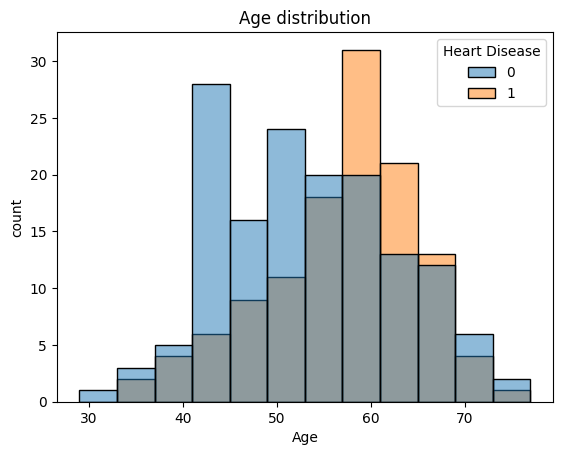

********BP********


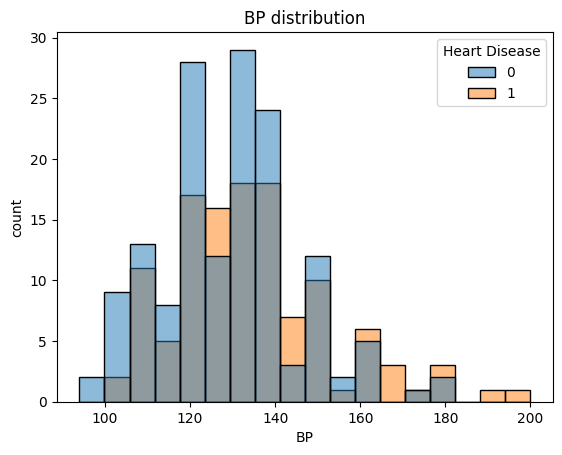

********Cholesterol********


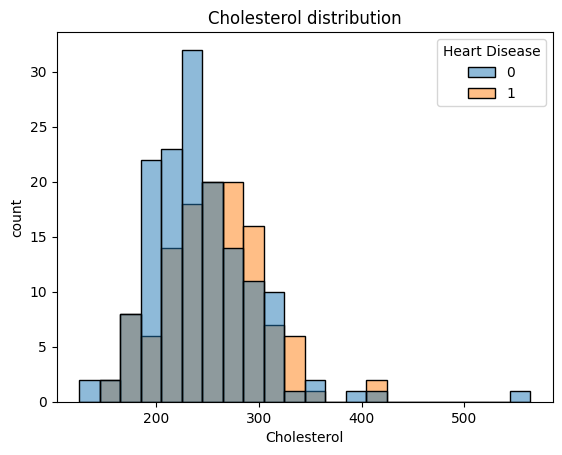

********Max HR********


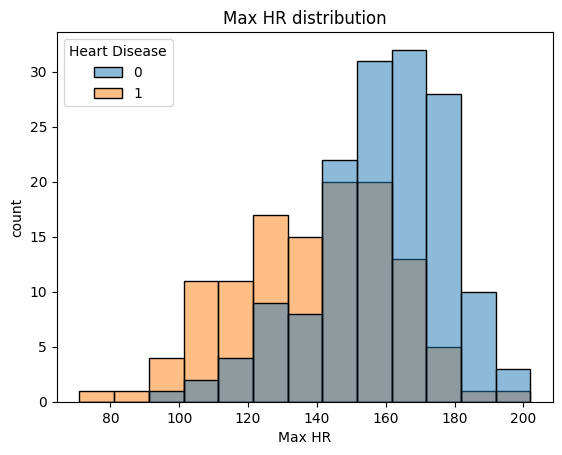

********ST depression********


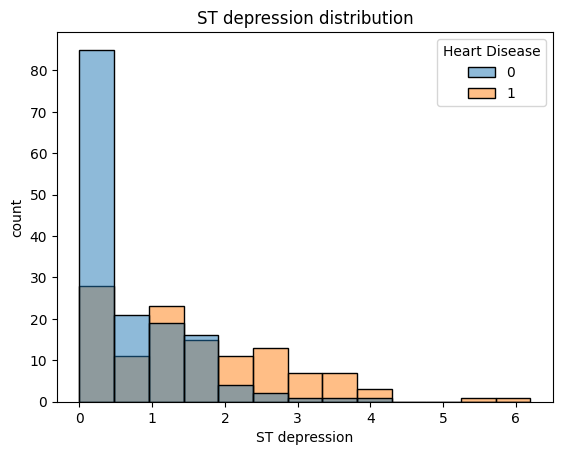

In [ ]:
for i in df.columns:
  if df[i].dtype != 'object' and df[i].nunique()>5:
    print("********"+i+"********")
    sns.histplot(data=df,x=i,hue = 'Heart Disease')
    plt.title(f'{i} distribution')
    plt.xlabel(i)
    plt.ylabel('count')
    plt.show()

# Building Model

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

In [ ]:
le = LabelEncoder()
df['Heart Disease'] = le.fit_transform(df['Heart Disease'])

In [ ]:
df.sample(6)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
123,65,0,3,160,360,0,2,151,0,0.8,1,0,3,0
146,52,1,4,112,230,0,0,160,0,0.0,1,1,3,1
117,56,0,4,200,288,1,2,133,1,4.0,3,2,7,1
220,54,1,4,110,239,0,0,126,1,2.8,2,1,7,1
48,66,1,2,160,246,0,0,120,1,0.0,2,3,6,1
60,57,1,3,150,126,1,0,173,0,0.2,1,1,7,0


In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('Heart Disease',axis=1))

In [ ]:
X = df_scaled
y = df['Heart Disease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Algorithms Used

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'K Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier()
}

# Training and Evaluating

In [ ]:
results = {}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...\n")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"{model_name} accuracy: {accuracy}")
    print(f"{model_name} precision: {precision}")
    print(f"{model_name} recall: {recall}")
    print(f"{model_name} confusion matrix:\n{cm}")
    print(f"{model_name} ROC AUC score: {roc_auc}\n")

    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'ROC AUC': roc_auc,
        'Confusion Matrix': cm.tolist() # Store confusion matrix as a list
    }


Training Logistic Regression...

Logistic Regression accuracy: 0.9074074074074074
Logistic Regression precision: 0.9
Logistic Regression recall: 0.8571428571428571
Logistic Regression confusion matrix:
[[31  2]
 [ 3 18]]
Logistic Regression ROC AUC score: 0.8982683982683983


Training K Nearest Neighbors...

K Nearest Neighbors accuracy: 0.8148148148148148
K Nearest Neighbors precision: 0.8235294117647058
K Nearest Neighbors recall: 0.6666666666666666
K Nearest Neighbors confusion matrix:
[[30  3]
 [ 7 14]]
K Nearest Neighbors ROC AUC score: 0.7878787878787877


Training Support Vector Machine...

Support Vector Machine accuracy: 0.8888888888888888
Support Vector Machine precision: 0.8947368421052632
Support Vector Machine recall: 0.8095238095238095
Support Vector Machine confusion matrix:
[[31  2]
 [ 4 17]]
Support Vector Machine ROC AUC score: 0.8744588744588745


Training Gaussian Naive Bayes...

Gaussian Naive Bayes accuracy: 0.9074074074074074
Gaussian Naive Bayes precision: 0.94

In [ ]:
results

{'Logistic Regression': {'Accuracy': 0.9074074074074074,
  'Precision': 0.9,
  'Recall': 0.8571428571428571,
  'ROC AUC': np.float64(0.8982683982683983),
  'Confusion Matrix': [[31, 2], [3, 18]]},
 'K Nearest Neighbors': {'Accuracy': 0.8148148148148148,
  'Precision': 0.8235294117647058,
  'Recall': 0.6666666666666666,
  'ROC AUC': np.float64(0.7878787878787877),
  'Confusion Matrix': [[30, 3], [7, 14]]},
 'Support Vector Machine': {'Accuracy': 0.8888888888888888,
  'Precision': 0.8947368421052632,
  'Recall': 0.8095238095238095,
  'ROC AUC': np.float64(0.8744588744588745),
  'Confusion Matrix': [[31, 2], [4, 17]]},
 'Gaussian Naive Bayes': {'Accuracy': 0.9074074074074074,
  'Precision': 0.9444444444444444,
  'Recall': 0.8095238095238095,
  'ROC AUC': np.float64(0.8896103896103897),
  'Confusion Matrix': [[32, 1], [4, 17]]},
 'Decision Tree Classifier': {'Accuracy': 0.6851851851851852,
  'Precision': 0.5769230769230769,
  'Recall': 0.7142857142857143,
  'ROC AUC': np.float64(0.69047619



---


# Model Selection


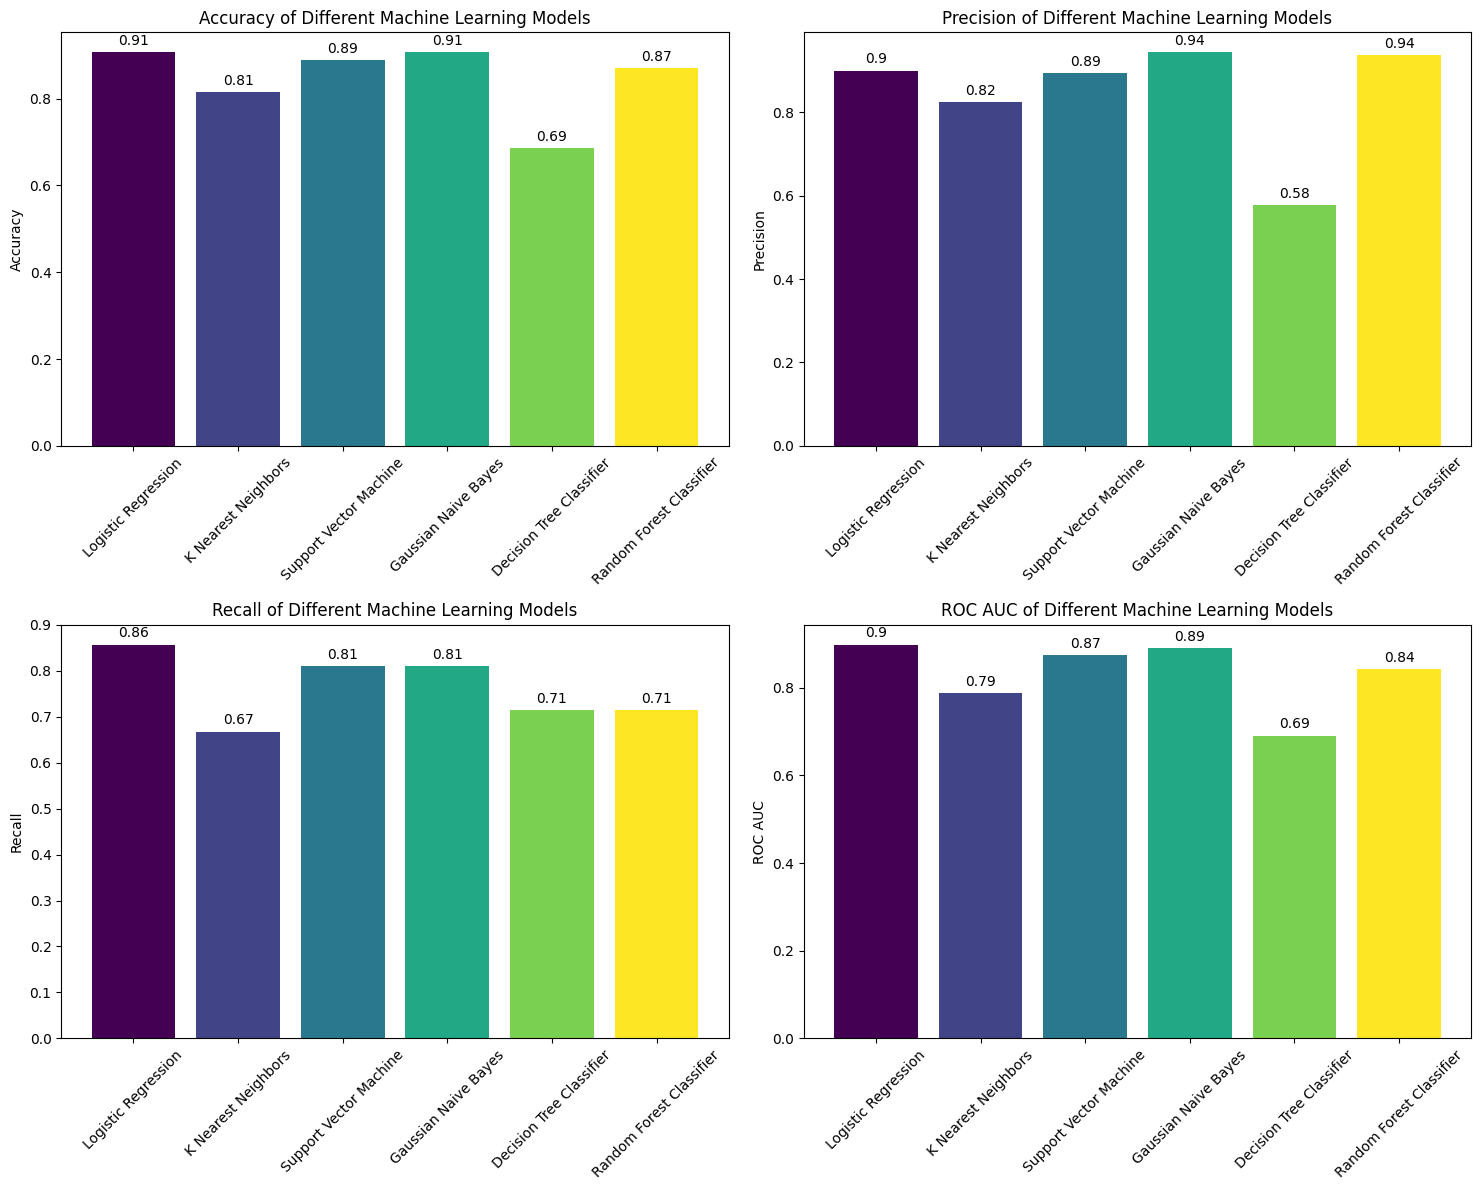

In [ ]:

model_names = list(results.keys())
metrics = ['Accuracy', 'Precision', 'Recall', 'ROC AUC']

n_metrics = len(metrics)
n_cols = 2  # Number of columns for subplots
n_rows = (n_metrics + n_cols - 1) // n_cols # Calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 6))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    metric_values = [results[model][metric] for model in model_names]
    bars = axes[i].bar(model_names, metric_values, color=plt.cm.viridis(np.linspace(0, 1, len(model_names))))
    axes[i].set_ylabel(metric)
    axes[i].set_title(f'{metric} of Different Machine Learning Models')
    axes[i].tick_params(axis='x', rotation=45)

    # Add values on top of the bars
    for bar in bars:
        yval = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



---


# Testing with Unknown Data


In [ ]:
# Select the Logistic Regression model
logistic_reg_model = models['Logistic Regression']

# Create some sample unknown data (ensure it has the same features as the training data)
# This is just example data. Replace with your actual unknown data.
# The order of features should be the same as in the original dataframe before scaling.
sample_unknown_data = np.array([[60, 1, 3, 130, 250, 0, 0, 150, 0, 1.0, 2, 0, 3],
                                [45, 0, 1, 120, 200, 0, 0, 170, 0, 0.0, 1, 0, 3],
                                [70, 1, 4, 140, 280, 1, 2, 100, 1, 2.0, 2, 3, 7]])

# Get the feature names from the original dataframe before scaling
feature_names = df.drop('Heart Disease', axis=1).columns

# Convert the sample unknown data to a DataFrame with feature names
sample_unknown_df = pd.DataFrame(sample_unknown_data, columns=feature_names)

# Scale the unknown data using the same scaler fitted on the training data
sample_unknown_data_scaled = scaler.transform(sample_unknown_df)

# Make predictions
predictions = logistic_reg_model.predict(sample_unknown_data_scaled)

# Decode the predictions back to original labels ('Absence' or 'Presence')
decoded_predictions = le.inverse_transform(predictions)

print("Predictions for the unknown data:")
print(decoded_predictions)

Predictions for the unknown data:
[0 0 1]
